# Categorical cross entropy

Used to compare actual probability (y) with predicted probability (y pred).

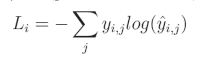

In [2]:
import numpy as np
import math

softmax_output= [0.7, 0.1, 0.2]
target_output= [1, 0, 0]

loss_manual= ((1 * math.log(0.7)) + (0 * math.log(0.1)) + (0 * math.log(0.1))) * -1
loss_numpy= (target_output[0] * math.log(softmax_output[0]) + 
             target_output[1] * math.log(softmax_output[1]) + 
             target_output[2] * math.log(softmax_output[2])) * -1

loss_manual, loss_numpy

(0.35667494393873245, 0.35667494393873245)

As we cann see above, the proba for target is 1 for correct class, and 0 for incorrect classes. Therefore, we can make the formula simplter by omitting incorrect classes (since they are 0) and not multiplying with target output (since it is one). The formula becomes: 

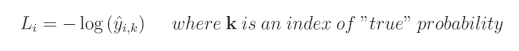

In [4]:
new_loss= -(math.log(softmax_output[0]))
new_loss

0.35667494393873245

In [10]:
# categorical cross entropy will output larger loss the lower the confidence is

for i in np.linspace(0.001, 1, 5):
    print(-math.log(i))

6.907755278982137
1.3832988521400922
0.6921476802268619
0.2873487946616606
-0.0


## What is log?

In [12]:
math.log(10)

2.302585092994046

In [14]:
math.e ** 2.302585092994046

10.000000000000002

## Calculation for single dimensional (categorical) output

In [18]:
softmax_outputs = [[0.7, 0.1, 0.2], # sample 1
                   [0.1, 0.5, 0.4], # sample 2
                   [0.02, 0.9, 0.08]] # sample 3
# class 0 = dog
# class 1 = cat
# class 2 = human
class_targets = [0, 1, 1] # dog, cat, cat

for target_idx, y_probs in zip(class_targets, softmax_outputs):
    y_prob= y_probs[target_idx]
    print(f'confidence = {y_prob}, loss = {-math.log(y_prob)}')

confidence = 0.7, loss = 0.35667494393873245
confidence = 0.5, loss = 0.6931471805599453
confidence = 0.9, loss = 0.10536051565782628


In [26]:
# simplified with numpy

softmax_outputs = np.array([[0.7, 0.1, 0.2], # sample 1
                            [0.1, 0.5, 0.4], # sample 2
                            [0.02, 0.9, 0.08]]) # sample 3
# class 0 = dog
# class 1 = cat
# class 2 = human
class_targets = [0, 1, 1] # dog, cat, cat

n_samples= softmax_outputs.shape[0] # return 3 
softmax_outputs[range(n_samples), class_targets]

array([0.7, 0.5, 0.9])

In [37]:
# simplified with numpy, now with proba

softmax_outputs = np.array([[0.7, 0.1, 0.2], # sample 1
                            [0.1, 0.5, 0.4], # sample 2
                            [0.02, 0.9, 0.08]]) # sample 3
# class 0 = dog
# class 1 = cat
# class 2 = human
class_targets = [0, 1, 1] # dog, cat, cat

n_samples= softmax_outputs.shape[0] # return 3 
y_pred= softmax_outputs[range(n_samples), class_targets]
neg_log= - np.log(y_pred)
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [38]:
avg_loss= np.mean(neg_log)
print(avg_loss)

0.38506088005216804


## Calculation for one-hot output

In [43]:
softmax_outputs = np.array([[0.7, 0.1, 0.2], 
                            [0.1, 0.5, 0.4], 
                            [0.02, 0.9, 0.08]])

cat_output= np.array([0, 1, 1])

oh_output = np.array([[1, 0, 0], 
                      [0, 1, 0], 
                      [0, 1, 0]])

# cat output is always 1 d
# one-hot output wil have more then 1d (usually 2)
print(cat_output.shape)
print(len(cat_output.shape))

print(oh_output.shape)
print(len(oh_output.shape))

(3,)
1
(3, 3)
2


In [45]:
# if we multiply y_pred with y_true, all other value will be 0 
softmax_outputs * oh_output

array([[0.7, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.9, 0. ]])

In [48]:
# take the sum and we'll get one number per sample
np.sum(softmax_outputs * oh_output, axis= 1)

array([0.7, 0.5, 0.9])

In [53]:
# then do the rest
np.log(np.sum(softmax_outputs * oh_output, axis= 1))

array([-0.35667494, -0.69314718, -0.10536052])

In [88]:
def cat_cross_entropy(y_true, y_pred):

    dimension= len(y_true.shape)
    n_samples= y_true.shape[0]

    # for categorical output
    if dimension == 1:
        y_pred_proba= y_pred[range(n_samples), y_true]
    
    # for one-hot output
    else: 
        y_pred_proba= np.sum(y_true * y_pred, axis= 1)
        
    neg_log= -(np.log(y_pred_proba))
    avg_neg_log= np.mean(neg_log)

    return avg_neg_log


softmax_outputs = np.array([[0.7, 0.1, 0.2], 
                            [0.1, 0.5, 0.4], 
                            [0.02, 0.9, 0.08]])

cat_output= np.array([0, 1, 1])

oh_output = np.array([[1, 0, 0], 
                      [0, 1, 0], 
                      [0, 1, 0]])

print(cat_cross_entropy(cat_output, softmax_outputs))
print(cat_cross_entropy(oh_output, softmax_outputs))

0.38506088005216804
0.38506088005216804
